In [37]:
import scipy.io as sio
import dotenv
import os

dotenv.load_dotenv()

INPUT_FOLDER = os.getenv("INPUT_FOLDER")

data1 = sio.loadmat(f"{INPUT_FOLDER}/2018-07-12_(S1)/ECoG.mat")
data2 = sio.loadmat(f"{INPUT_FOLDER}/2018-07-19_(S2)/ECoG.mat")
data3 = sio.loadmat(f"{INPUT_FOLDER}/2018-07-26_(S3)/ECoG.mat")
data4 = sio.loadmat(f"{INPUT_FOLDER}/2018-08-14_(S4)/ECoG.mat")
data5 = sio.loadmat(f"{INPUT_FOLDER}/2018-09-27_(S5)/ECoG.mat")
data6 = sio.loadmat(f"{INPUT_FOLDER}/2018-10-04_(S6)/ECoG.mat")


# Please refer to dataset description to see what are these different sessions all about

ECoG shape: (1024398, 64)
ECoG dtype: float64
ECoG min: -3413.33
ECoG max: 2671.98
ECoG mean: 0.08538006834257779
ECoG std: 260.8560070736566


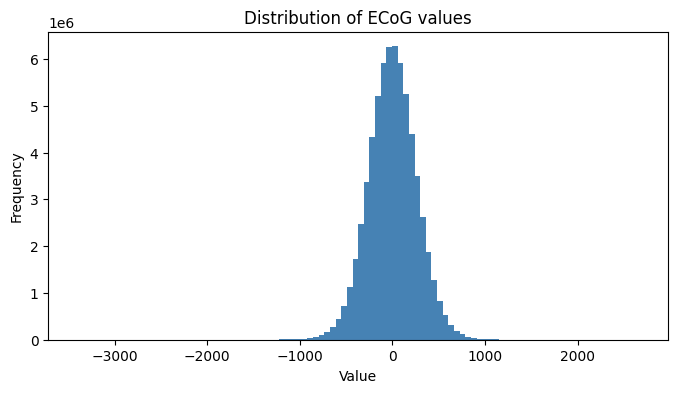

In [15]:
import numpy as np

# Concatenate all ecog arrays along the time/sample axis
ecog = data1["ECoG"]
time = data1["ECoG_time"] 
print("ECoG shape:", ecog.shape)
print("ECoG dtype:", ecog.dtype)
print("ECoG min:", np.min(ecog))
print("ECoG max:", np.max(ecog))
print("ECoG mean:", np.mean(ecog))
print("ECoG std:", np.std(ecog))

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(ecog.flatten(), bins=100, color="steelblue")
plt.title("Distribution of ECoG values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Data

In the dataset they have 6 different points where they collected the data. I analyse these 6 different components separately, but then combine and show them together in the end

### data 1

In [16]:
from scipy.signal import butter, filtfilt

ecog = data1["ECoG"]
time = data1["ECoG_time"]
fs = float(data1["Fs"].squeeze())  # Sampling frequency

# Band-pass filter design (1-100 Hz)
lowcut = 1.0
highcut = 100.0
order = 4
nyq = fs / 2
b, a = butter(order, [lowcut / nyq, highcut / nyq], btype='band')

# Apply filter to each channel (axis 1: samples)
ecog_filtered = filtfilt(b, a, ecog, axis=1)

# Z-score normalization of each channel (over time/samples)
ecog_zscored = (ecog_filtered - np.mean(ecog_filtered, axis=1, keepdims=True)) / np.std(ecog_filtered, axis=1, keepdims=True)

# Replace ecog with z-scored, filtered version for subsequent use
ecog = ecog_zscored

Explained variance by first 6 PCs: 0.9120784445356094


/Users/emil/Desktop/assignments/TDA/assignment2/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


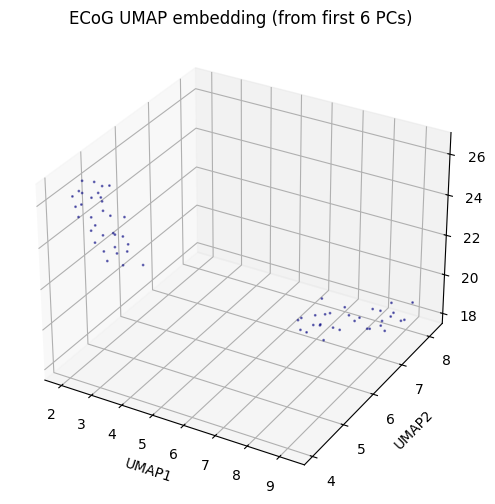

In [17]:
from sklearn.decomposition import PCA
import umap

# ecog shape: (n_channels, n_samples)
# We'll treat time (samples) as data points and channels as features for PCA.
# So, transpose to (n_samples, n_channels)
X = ecog.T

# Apply PCA, retain first 6 principal components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)  # shape: (n_samples, 6)

print("Explained variance by first 6 PCs:", np.sum(pca.explained_variance_ratio_))

# Now reduce to 3D with UMAP for visualization
import umap
umap_reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_reducer.fit_transform(X_pca)  # shape: (n_samples, 3)

# Optional: plot 3D UMAP embedding for a quick look
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_umap[:,0], X_umap[:,1], X_umap[:,2], s=1, c='navy', alpha=0.5)
ax.set_title('ECoG UMAP embedding (from first 6 PCs)')
ax.set_xlabel('UMAP1'); ax.set_ylabel('UMAP2'); ax.set_zlabel('UMAP3')
plt.show()


### data 2


In [18]:
from scipy.signal import butter, filtfilt

ecog = data2["ECoG"]
time = data2["ECoG_time"]
fs = float(data2["Fs"].squeeze())  # Sampling frequency

# Band-pass filter design (1-100 Hz)
lowcut = 1.0
highcut = 100.0
order = 4
nyq = fs / 2
b, a = butter(order, [lowcut / nyq, highcut / nyq], btype='band')

# Apply filter to each channel (axis 1: samples)
ecog_filtered = filtfilt(b, a, ecog, axis=1)

# Z-score normalization of each channel (over time/samples)
ecog_zscored = (ecog_filtered - np.mean(ecog_filtered, axis=1, keepdims=True)) / np.std(ecog_filtered, axis=1, keepdims=True)

# Replace ecog with z-scored, filtered version for subsequent use
ecog = ecog_zscored

Explained variance by first 6 PCs: 0.9051198961766266


/Users/emil/Desktop/assignments/TDA/assignment2/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


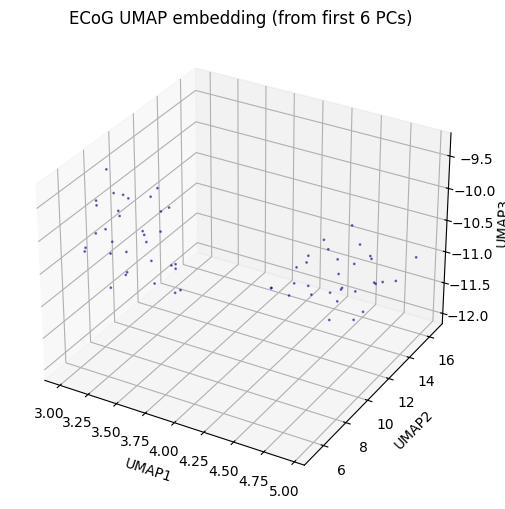

In [19]:
from sklearn.decomposition import PCA
import umap

# ecog shape: (n_channels, n_samples)
# We'll treat time (samples) as data points and channels as features for PCA.
# So, transpose to (n_samples, n_channels)
X = ecog.T

# Apply PCA, retain first 6 principal components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)  # shape: (n_samples, 6)

print("Explained variance by first 6 PCs:", np.sum(pca.explained_variance_ratio_))

# Now reduce to 3D with UMAP for visualization
import umap
umap_reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_reducer.fit_transform(X_pca)  # shape: (n_samples, 3)

# Optional: plot 3D UMAP embedding for a quick look
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_umap[:,0], X_umap[:,1], X_umap[:,2], s=1, c='navy', alpha=0.5)
ax.set_title('ECoG UMAP embedding (from first 6 PCs)')
ax.set_xlabel('UMAP1'); ax.set_ylabel('UMAP2'); ax.set_zlabel('UMAP3')
plt.show()


### data 3

In [ ]:
from scipy.signal import butter, filtfilt

ecog = data3["ECoG"]
time = data3["ECoG_time"]
fs = float(data3["Fs"].squeeze())  # Sampling frequency

# Band-pass filter design (1-100 Hz)
lowcut = 1.0x
highcut = 100.0
order = 4
nyq = fs / 2
b, a = butter(order, [lowcut / nyq, highcut / nyq], btype='band')

# Apply filter to each channel (axis 1: samples)
ecog_filtered = filtfilt(b, a, ecog, axis=1)

# Z-score normalization of each channel (over time/samples)
ecog_zscored = (ecog_filtered - np.mean(ecog_filtered, axis=1, keepdims=True)) / np.std(ecog_filtered, axis=1, keepdims=True)

# Replace ecog with z-scored, filtered version for subsequent use
ecog = ecog_zscored

Explained variance by first 6 PCs: 0.9137362506401854


/Users/emil/Desktop/assignments/TDA/assignment2/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


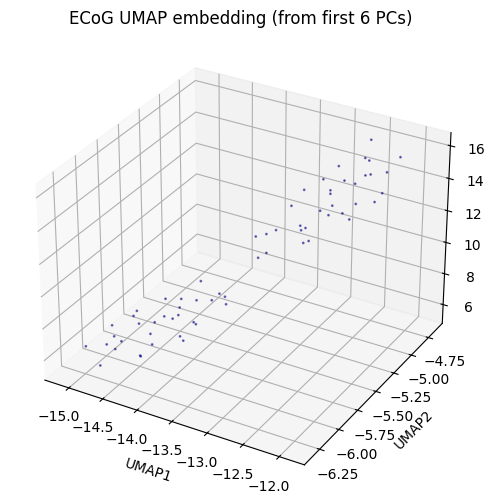

In [21]:
from sklearn.decomposition import PCA
import umap

# ecog shape: (n_channels, n_samples)
# We'll treat time (samples) as data points and channels as features for PCA.
# So, transpose to (n_samples, n_channels)
X = ecog.T

# Apply PCA, retain first 6 principal components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)  # shape: (n_samples, 6)

print("Explained variance by first 6 PCs:", np.sum(pca.explained_variance_ratio_))

# Now reduce to 3D with UMAP for visualization
import umap
umap_reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_reducer.fit_transform(X_pca)  # shape: (n_samples, 3)

# Optional: plot 3D UMAP embedding for a quick look
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_umap[:,0], X_umap[:,1], X_umap[:,2], s=1, c='navy', alpha=0.5)
ax.set_title('ECoG UMAP embedding (from first 6 PCs)')
ax.set_xlabel('UMAP1'); ax.set_ylabel('UMAP2'); ax.set_zlabel('UMAP3')
plt.show()


### data 4

In [22]:
from scipy.signal import butter, filtfilt

ecog = data4["ECoG"]
time = data4["ECoG_time"]
fs = float(data4["Fs"].squeeze())  # Sampling frequency

# Band-pass filter design (1-100 Hz)
lowcut = 1.0
highcut = 100.0
order = 4
nyq = fs / 2
b, a = butter(order, [lowcut / nyq, highcut / nyq], btype='band')

# Apply filter to each channel (axis 1: samples)
ecog_filtered = filtfilt(b, a, ecog, axis=1)

# Z-score normalization of each channel (over time/samples)
ecog_zscored = (ecog_filtered - np.mean(ecog_filtered, axis=1, keepdims=True)) / np.std(ecog_filtered, axis=1, keepdims=True)

# Replace ecog with z-scored, filtered version for subsequent use
ecog = ecog_zscored

Explained variance by first 6 PCs: 0.9174224271127888


/Users/emil/Desktop/assignments/TDA/assignment2/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


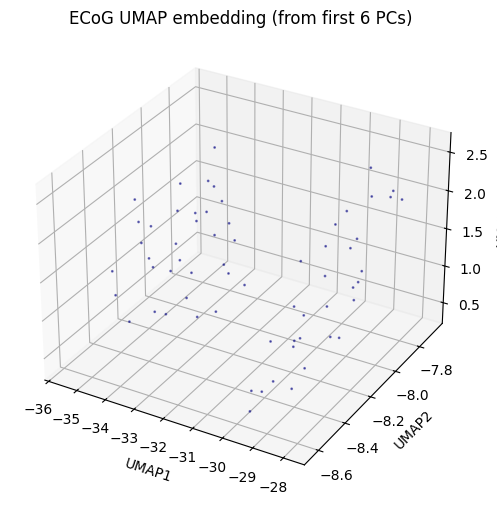

In [23]:
from sklearn.decomposition import PCA
import umap

# ecog shape: (n_channels, n_samples)
# We'll treat time (samples) as data points and channels as features for PCA.
# So, transpose to (n_samples, n_channels)
X = ecog.T

# Apply PCA, retain first 6 principal components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)  # shape: (n_samples, 6)

print("Explained variance by first 6 PCs:", np.sum(pca.explained_variance_ratio_))

# Now reduce to 3D with UMAP for visualization
import umap
umap_reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_reducer.fit_transform(X_pca)  # shape: (n_samples, 3)

# Optional: plot 3D UMAP embedding for a quick look
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_umap[:,0], X_umap[:,1], X_umap[:,2], s=1, c='navy', alpha=0.5)
ax.set_title('ECoG UMAP embedding (from first 6 PCs)')
ax.set_xlabel('UMAP1'); ax.set_ylabel('UMAP2'); ax.set_zlabel('UMAP3')
plt.show()


### data 5

In [26]:
from scipy.signal import butter, filtfilt

ecog = data5["ECoG"]
time = data5["ECoG_time"]
fs = float(data5["Fs"].squeeze())  # Sampling frequency

# Band-pass filter design (1-100 Hz)
lowcut = 1.0
highcut = 100.0
order = 4
nyq = fs / 2
b, a = butter(order, [lowcut / nyq, highcut / nyq], btype='band')

# Apply filter to each channel (axis 1: samples)
ecog_filtered = filtfilt(b, a, ecog, axis=1)

# Z-score normalization of each channel (over time/samples)
ecog_zscored = (ecog_filtered - np.mean(ecog_filtered, axis=1, keepdims=True)) / np.std(ecog_filtered, axis=1, keepdims=True)

# Replace ecog with z-scored, filtered version for subsequent use
ecog = ecog_zscored

Explained variance by first 6 PCs: 0.9094460946909136


/Users/emil/Desktop/assignments/TDA/assignment2/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


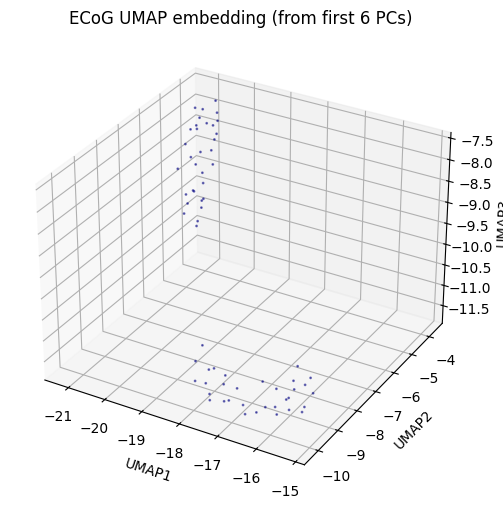

In [27]:
from sklearn.decomposition import PCA
import umap

# ecog shape: (n_channels, n_samples)
# We'll treat time (samples) as data points and channels as features for PCA.
# So, transpose to (n_samples, n_channels)
X = ecog.T

# Apply PCA, retain first 6 principal components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)  # shape: (n_samples, 6)

print("Explained variance by first 6 PCs:", np.sum(pca.explained_variance_ratio_))

# Now reduce to 3D with UMAP for visualization
import umap
umap_reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_reducer.fit_transform(X_pca)  # shape: (n_samples, 3)

# Optional: plot 3D UMAP embedding for a quick look
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_umap[:,0], X_umap[:,1], X_umap[:,2], s=1, c='navy', alpha=0.5)
ax.set_title('ECoG UMAP embedding (from first 6 PCs)')
ax.set_xlabel('UMAP1'); ax.set_ylabel('UMAP2'); ax.set_zlabel('UMAP3')
plt.show()


### data 6

In [28]:
from scipy.signal import butter, filtfilt

ecog = data6["ECoG"]
time = data6["ECoG_time"]
fs = float(data6["Fs"].squeeze())  # Sampling frequency

# Band-pass filter design (1-100 Hz)
lowcut = 1.0
highcut = 100.0
order = 4
nyq = fs / 2
b, a = butter(order, [lowcut / nyq, highcut / nyq], btype='band')

# Apply filter to each channel (axis 1: samples)
ecog_filtered = filtfilt(b, a, ecog, axis=1)

# Z-score normalization of each channel (over time/samples)
ecog_zscored = (ecog_filtered - np.mean(ecog_filtered, axis=1, keepdims=True)) / np.std(ecog_filtered, axis=1, keepdims=True)

# Replace ecog with z-scored, filtered version for subsequent use
ecog = ecog_zscored

Explained variance by first 6 PCs: 0.9015656878860074


/Users/emil/Desktop/assignments/TDA/assignment2/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


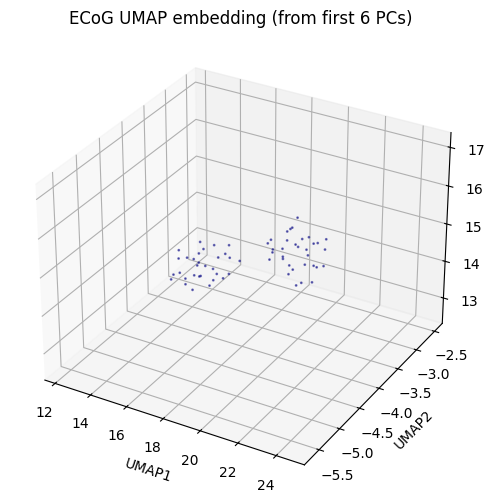

In [29]:
from sklearn.decomposition import PCA
import umap

# ecog shape: (n_channels, n_samples)
# We'll treat time (samples) as data points and channels as features for PCA.
# So, transpose to (n_samples, n_channels)
X = ecog.T

# Apply PCA, retain first 6 principal components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)  # shape: (n_samples, 6)

print("Explained variance by first 6 PCs:", np.sum(pca.explained_variance_ratio_))

# Now reduce to 3D with UMAP for visualization
import umap
umap_reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_reducer.fit_transform(X_pca)  # shape: (n_samples, 3)

# Optional: plot 3D UMAP embedding for a quick look
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_umap[:,0], X_umap[:,1], X_umap[:,2], s=1, c='navy', alpha=0.5)
ax.set_title('ECoG UMAP embedding (from first 6 PCs)')
ax.set_xlabel('UMAP1'); ax.set_ylabel('UMAP2'); ax.set_zlabel('UMAP3')
plt.show()


/Users/emil/Desktop/assignments/TDA/assignment2/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/emil/Desktop/assignments/TDA/assignment2/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/emil/Desktop/assignments/TDA/assignment2/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/emil/Desktop/assignments/TDA/assignment2/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/emil/Desktop/assignments/TDA/assignment2/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random

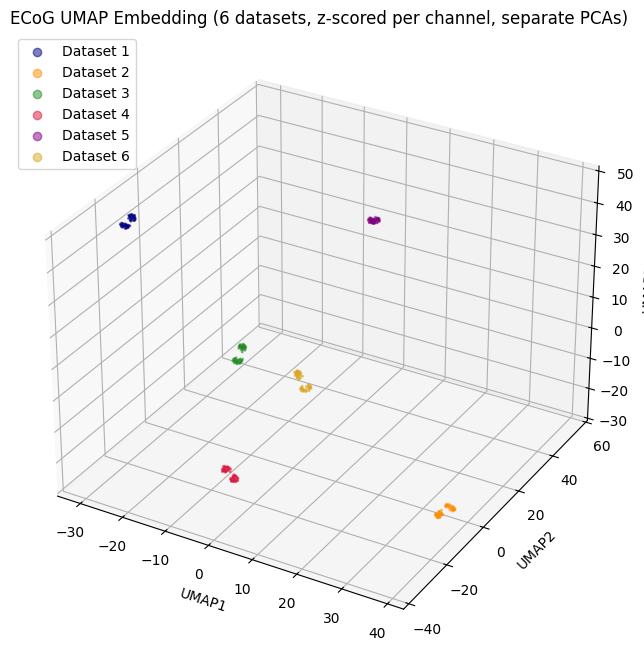

In [33]:
# For this analysis, we'll normalize each ECoG dataset before dimensionality reduction
# so that all datasets are on the same scale. We'll z-score each channel (feature) 
# within its own dataset over time.

ecog1 = data1["ECoG"]
ecog2 = data2["ECoG"]
ecog3 = data3["ECoG"]
ecog4 = data4["ECoG"]
ecog5 = data5["ECoG"]
ecog6 = data6["ECoG"]

ecog_datasets = [ecog1, ecog2, ecog3, ecog4, ecog5, ecog6]
dataset_labels = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4', 'Dataset 5', 'Dataset 6']
colors = ['navy', 'darkorange', 'forestgreen', 'crimson', 'purple', 'goldenrod']

all_X_umaps = []
for idx, ecog_ds in enumerate(ecog_datasets):
    # Z-score normalization over time for each channel
    # ecog_ds: shape (n_channels, n_time)
    ecog_norm = (ecog_ds - np.mean(ecog_ds, axis=1, keepdims=True)) / np.std(ecog_ds, axis=1, keepdims=True)
    
    # Now time is samples, so shape (n_time, n_channels)
    X_ds = ecog_norm.T

    # Separate PCA for each dataset, always reducing features (channels)
    pca_ds = PCA(n_components=6)
    X_pca_ds = pca_ds.fit_transform(X_ds)
    
    # UMAP reduction for visualization
    umap_reducer_ds = umap.UMAP(n_components=3, random_state=42)
    X_umap_ds = umap_reducer_ds.fit_transform(X_pca_ds)
    
    all_X_umaps.append(X_umap_ds)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for i, X_umap_ds in enumerate(all_X_umaps):
    ax.scatter(X_umap_ds[:,0], X_umap_ds[:,1], X_umap_ds[:,2], 
               s=1, c=colors[i], alpha=0.5, label=dataset_labels[i])

ax.set_title('ECoG UMAP Embedding (6 datasets, z-scored per channel, separate PCAs)')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
ax.legend(markerscale=6, loc='upper left', fontsize='medium')
plt.show()
